In [1]:
import pandas as pd

#Use imported pandas to load data
boston = pd.read_csv("boston.csv")
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
#Dataset description
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
#Check the data to see their type and to check for any missing data
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [53]:
#Listing out all the features, MEDV being the target

features = boston.loc[:,["CRIM","ZN","INDUS","CHAS","NOX","AGE","RM","DIS","RAD","TAX","PTRATIO","B","LSTAT"]]

#Selecting few features that appear logically more relevant to MEDV prediction
features_few = boston.loc[:,["CRIM","RM","DIS","RAD","LSTAT"]]

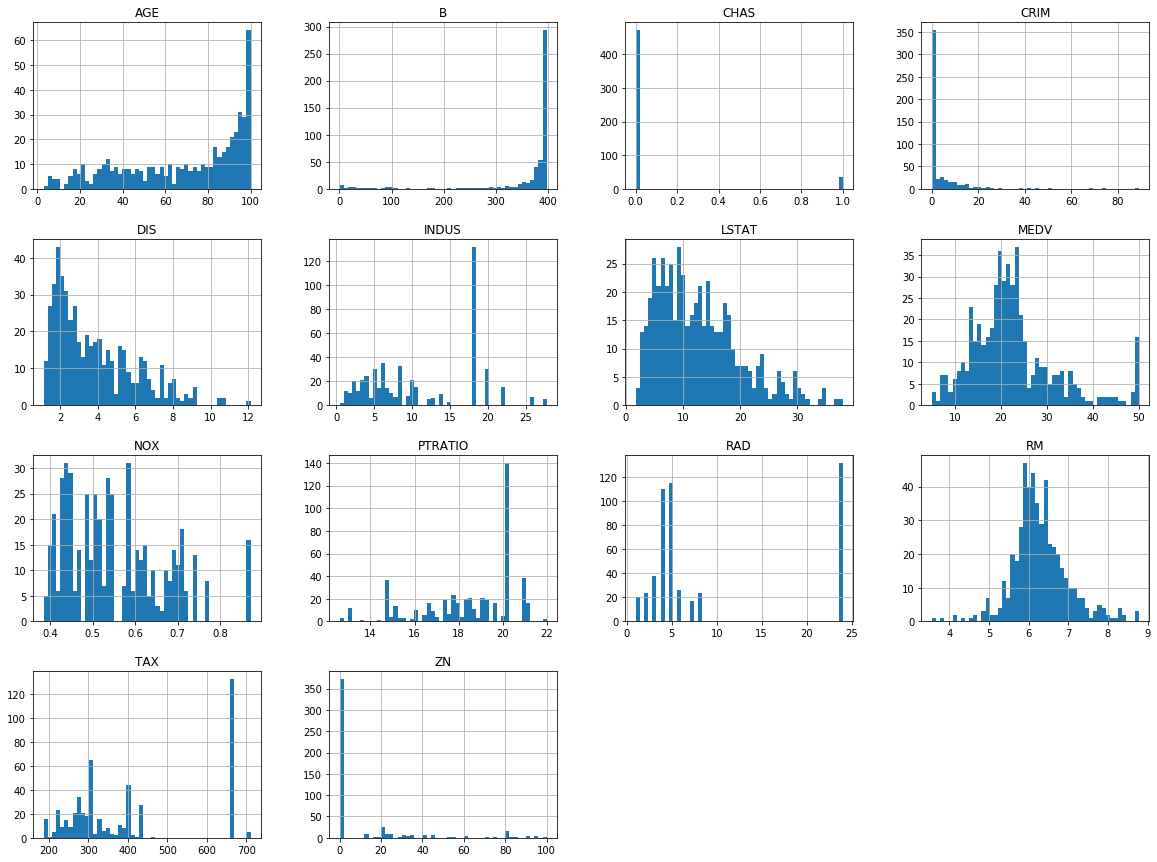

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
# Code example
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
boston = pd.read_csv("boston.csv")

# Prepare the data
X = features_few
y = boston["MEDV"]

# Visualize the data
boston.hist(bins=50, figsize=(20,15))
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction
#print(model.predict(X_new)) 

In [56]:
# Make predictions for a serially selected data, i.e every 21st data point in the rows
X_new = features_few[::20]  
y_pred = model.predict(X_new)
print(y_pred) 

[29.75314915 14.22744153 32.93364913 17.71154472 29.23110886 28.1733875
 21.26424414 16.74672532 28.81123659 34.79270712 30.46446087 28.79862056
 25.41073612 30.85532317 36.09343228 27.81693867 26.94770383 23.13362316
 25.77981625 15.70063479 10.27866319 21.03962478 12.50864782 21.69508059
 22.40390164 21.58622309]


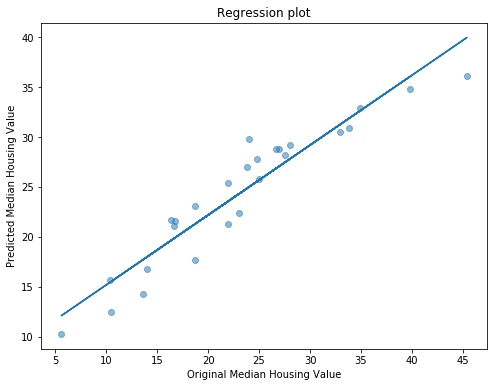

In [118]:
#check with the original data using regression plot
y_new = y[::20]
plt.figure(figsize=(8,6))
plt.scatter(x=y_new, y=y_pred, alpha=0.5)


#Adding line of fit
m, b = np.polyfit(y_new, y_pred, 1)  #y_new stands for x, while y_pred is on y axis
plt.plot(y_new, m*y_new + b)         #this is linear equation, x, mx+b
plt.xlabel('Original Median Housing Value')
plt.ylabel('Predicted Median Housing Value')
plt.title('Regression plot')

plt.show()

In [59]:
#Correlation coeff of the prediction
from scipy.stats import pearsonr
corr, _ = pearsonr(y_new, y_pred)
print(corr)

0.946965910929751


INTERPRETATION
The prediction is not bad because the accuracy is 94.69%.
A note for caution however is, the test set was part of training set. So, we cannot really praise the model.
Solution: Split out a portion of the data before training the model.

In [60]:
#Spliting the data into training and testing sets. 
#The following split is great but not the best. Why?
# The random split change after re-opening the notebook

import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42)      #This prevents the random generator from changing until after closing the notebook
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [61]:
#Split out 20% as test_set
train_set,test_set = split_train_test(boston, 0.2)

#Check the length of the train set
len(train_set)

405

In [62]:
#Prepare input for training from train_set using only a selected features
tr_IN = train_set[["CRIM","RM","DIS","RAD","LSTAT"]]
X_ = tr_IN

#Prepare target for training from train_set
tr_OUT = train_set["MEDV"]
y_ = tr_OUT


#Repeat the above for test set
X_new2 = test_set[["CRIM","RM","DIS","RAD","LSTAT"]]
y_new2 = test_set["MEDV"]

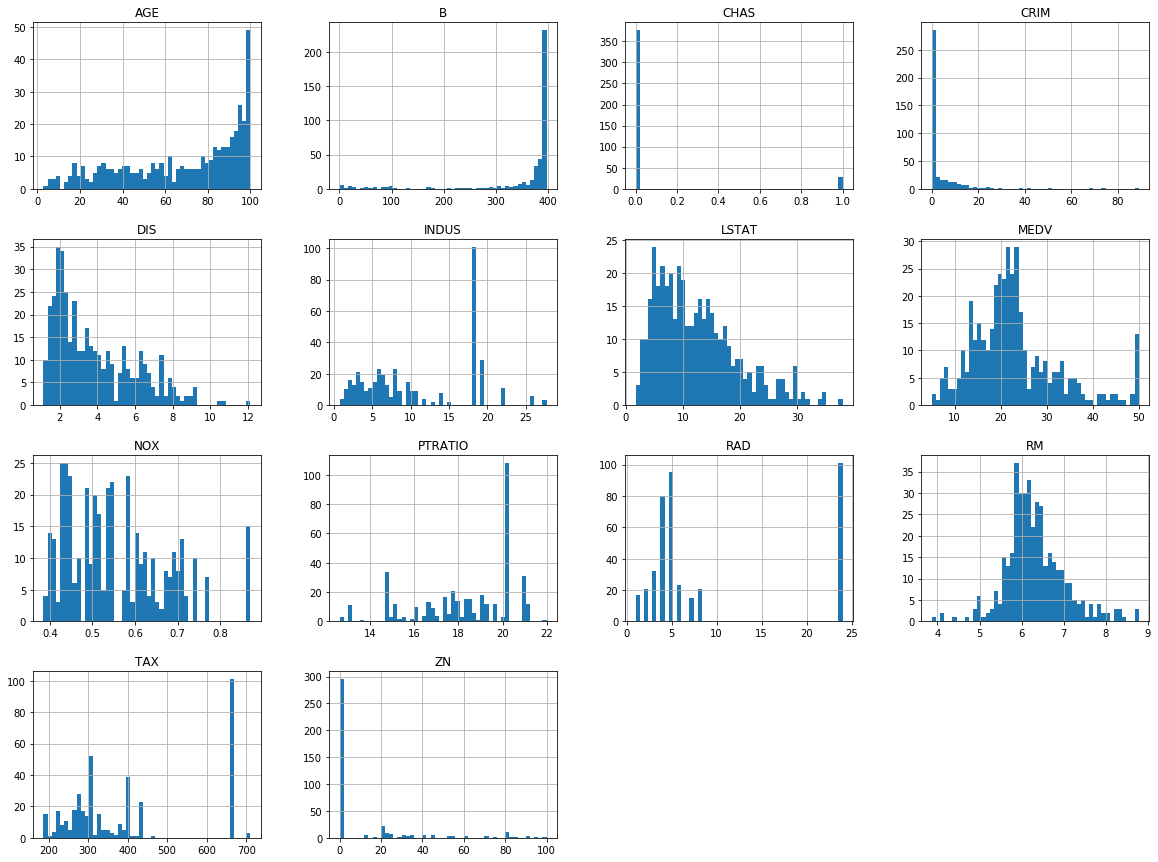

In [63]:
# Visualize the train data to see if the general pattern is preserved after random division
train_set.hist(bins=50, figsize=(20,15))
plt.show()

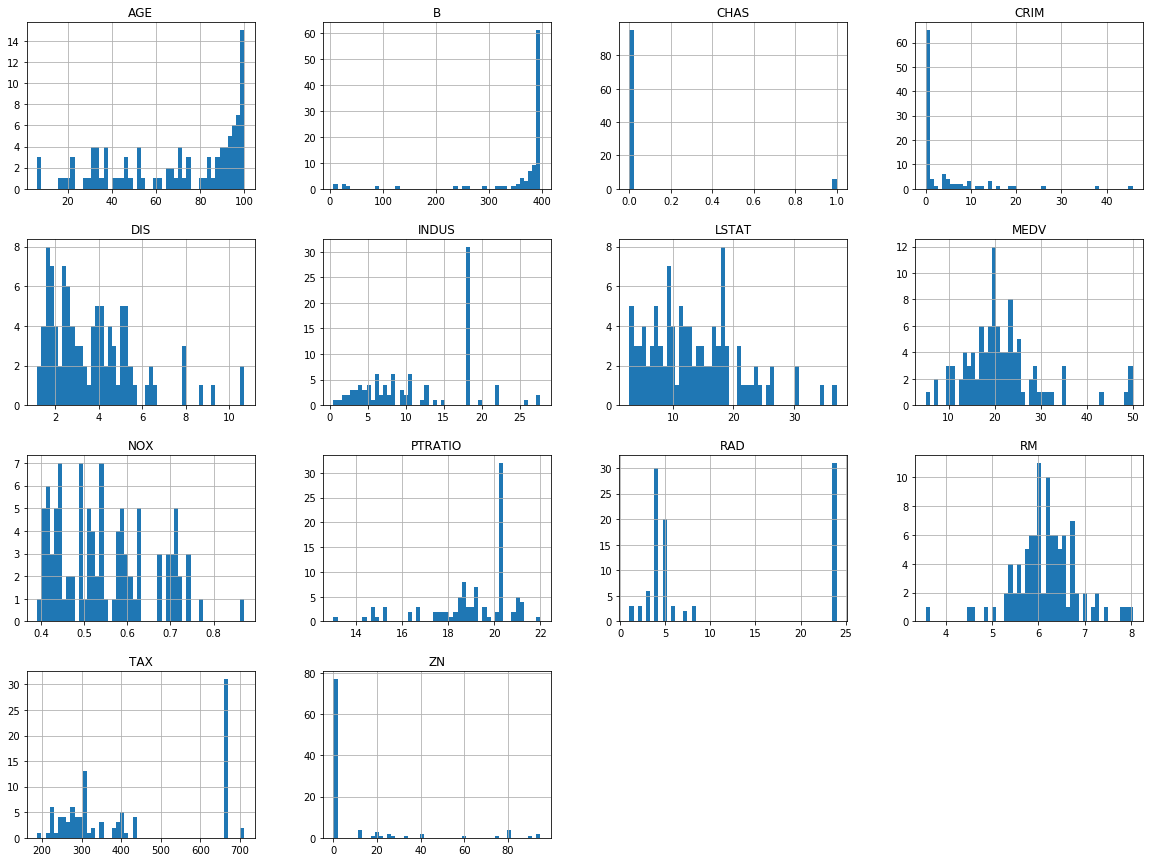

In [45]:
# Visualize the test data and compare to see if the pattern is preserved after random division
test_set.hist(bins=50, figsize=(20,15))
plt.show()

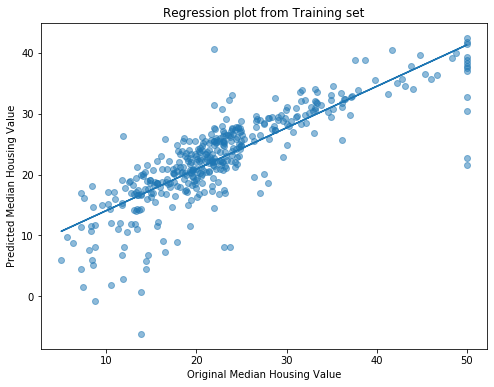

0.8250841238849571

In [119]:
# Time to train. Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X_, y_)

#Predict data in training set and visualize
y_pred1 = model.predict(X_)

#showing in plots
plt.figure(figsize=(8,6))
plt.scatter(x=y_, y=y_pred1, alpha=0.5)
m, b = np.polyfit(y_, y_pred1, 1)
plt.plot(y_, m*y_ + b)
plt.xlabel('Original Median Housing Value')
plt.ylabel('Predicted Median Housing Value')
plt.title('Regression plot from Training set')

plt.show()

#Correlation coeff of the prediction
corr1, _ = pearsonr(y_, y_pred1)
corr1

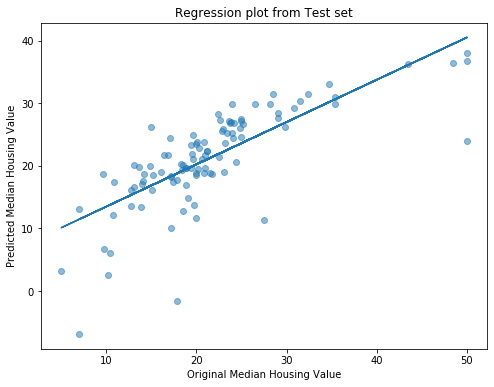

0.7563677275050991

In [120]:
#Predicting with test_set to evaluate the model
y_pred2 = model.predict(X_new2)

plt.figure(figsize=(8,6))
plt.scatter(x=y_new2, y=y_pred2, alpha=0.5)

#Adding line of fit
m, b = np.polyfit(y_new2, y_pred2, 1)  #y_new stands for x, while y_pred is on y axis
plt.plot(y_new2, m*y_new2 + b)         #this is linear equation, x, mx+b
plt.xlabel('Original Median Housing Value')
plt.ylabel('Predicted Median Housing Value')
plt.title('Regression plot from Test set')

plt.show()

#Correlation coeff of the prediction
corr2, _ = pearsonr(y_new2, y_pred2)
corr2

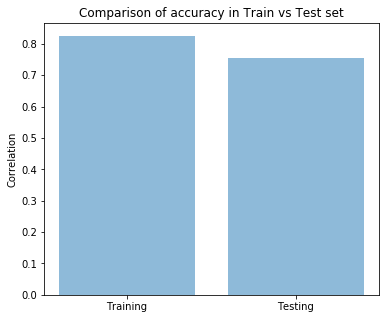

In [123]:
plt.figure(figsize=(6,5))

split_set = ('Training', 'Testing')
y_pos = np.arange(len(split_set))
correlation = (corr1,corr2)

plt.bar(y_pos, correlation, alpha=0.5)
plt.xticks(y_pos, split_set)
plt.ylabel('Correlation')
plt.title('Comparison of accuracy in Train vs Test set')
plt.show()

Outcomes:

The trained Linear Regression model can be used to predict median housing value in Boston with roughly 75% accuracy over. 
Although the prediction performance is not so great, it is not bad. Other learners would be applied to see which learner would give best performance.